In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from random import randint, randrange, sample

In [2]:
data4=pd.read_csv('41467_2021_21824_MOESM4_ESM- Supplementary Data 1.csv')
data5=pd.read_csv('41467_2021_21824_MOESM5_ESM - Supplementary Data 2.csv')
data6=pd.read_csv('41467_2021_21824_MOESM6_ESM.csv',header=1)

In [82]:
data4_BSQ=data4[data4['System']=='BSQ']
data4_EPB=data4[data4['System']=='EPB']
data4_CSM=data4[data4['System']=='CSM']

data5_BSQ=data5[data5['System']=='BSQ']

data6_BSQ=data6[data6['System']=='BSQ']

In [145]:
graph=nx.DiGraph()
for n in data4_BSQ['SpeciesID']:
    graph.add_node(n)
for n in range(len(data5_BSQ['ResourceSpeciesID'])):
    graph.add_edge(data5_BSQ['ConsumerSpeciesID'][n],data5_BSQ['ResourceSpeciesID'][n])

In [ ]:
subax1 = plt.subplot(121)
nx.draw(graph, with_labels=True)
# subax2 = plt.subplot(122)
# nx.draw_shell(graph, with_labels=False)

In [238]:
def alone_no(graph,primary):
    a=[]
    for i in (graph.nodes()-primary): #list subtraction
        if len(graph.adj[i])==0:
            a.append(i)
    return len(a)

def alone_list(graph):
    a=[]
    for i in graph.nodes():
        if len(graph.adj[i])==0:
            a.append(i)
    return a

def not_alone_no(graph,primary):
    a=[]
    for i in (graph.nodes()-primary): #list subtraction
        if len(graph.adj[i])!=0:
            a.append(i)
    return len(a)
def is_alone(graph):#add recursion 
    a=[]
    for i in (graph.nodes()-primary): #list subtraction
        if len(graph.adj[i])==0:
            a.append(i)
    return a
#write recursion function that remembers the neighbors before the node is removed

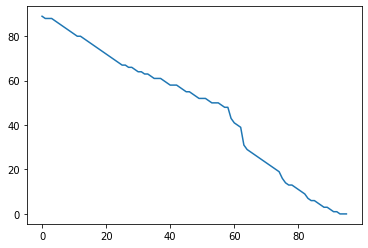

In [244]:
#obtaining number of species that are not extinct (y), by total number of ar

graph=nx.DiGraph()
for n in data4_BSQ['SpeciesID']:
    graph.add_node(n)
for n in range(len(data5_BSQ['ResourceSpeciesID'])):
    graph.add_edge(data5_BSQ['ConsumerSpeciesID'][n],data5_BSQ['ResourceSpeciesID'][n])

to_remove=sample(data4_BSQ['SpeciesID'].tolist(),len(data4_BSQ))        


    
alone=[]
primary=alone_list(graph)
for elem in to_remove:
    if elem in graph.nodes():
        graph.remove_node(elem)
        alone.append(not_alone_no(graph,primary))
        graph.remove_nodes_from(is_alone(graph))

plt.plot(alone)

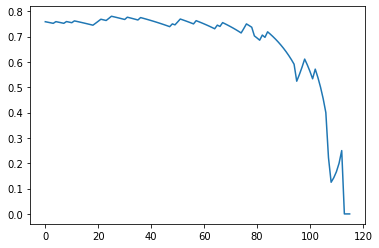

In [233]:
#obtaining number of species that are not extinct (y), by total number of ar

graph=nx.DiGraph()
for n in data4_BSQ['SpeciesID']:
    graph.add_node(n)
for n in range(len(data5_BSQ['ResourceSpeciesID'])):
    graph.add_edge(data5_BSQ['ConsumerSpeciesID'][n],data5_BSQ['ResourceSpeciesID'][n])

to_remove=sample(data4_BSQ['SpeciesID'].tolist(),len(data4_BSQ))        


    
alone=[]
primary=alone_list(graph)
for elem in to_remove:
    graph.remove_node(elem)
    alone.append(not_alone_no(graph,primary)/(len(graph.nodes())+1))
    


plt.plot(alone)

In [12]:
def recursion(graph,set):
    remove_set=[] #set of nodes that will go extinct
    for a in set:
        neigh=in_neigh(a) #list of incoming neighbours
        for n in neigh:
            if len(graph.adj[n])==1: #if the neighbour only feeds on the node we want to remove then add it to the exticnt list
                remove_set.append(n)    
        if len(remove_set)!=0: #repeat the process through the nodes we will remove to check if others are also affected
            remove_set.append(recursion(graph,remove_set))
    return remove_set

In [28]:
def recursion2(graph,set): #for few simple, specific undirected simplifications of directed graphs
    remove_set=[]#set of nodes that will go extinct
    for a in set:
        neigh=graph.adj[a]
        for n in neigh:
            if len(graph.adj[n])==1: #if the neighbor is only connected to the node we want to remove then add it to the exticnt list
                remove_set.append(n)    
        if len(remove_set)!=0: #repeat the process through the nodes we will remove to check if others are also affected
            remove_set.append(recursion2(graph,remove_set))
    return remove_set

In [2]:
graph2=nx.DiGraph()
graph2.add_nodes_from([1,2,3,4,5])
graph2.add_edges_from([[2,1],[3,1],[4,1],[4,5]])

NameError: name 'nx' is not defined

In [9]:
print(graph2.adj)

{1: {2: {}, 3: {}, 4: {}}, 2: {}, 3: {}, 4: {5: {}}, 5: {}}
